In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [3]:
def seir1(x, t):
    S, E, Is, Ias, Q, Qprime, C, Rwd, D, Rd = x
    n = sum(x)
    b1 = 0.5
    b2 = 0.1458
    b3 = 0.1458
    b4 = 0.05
    u = 0.5
    v = 0.05
    e = 0.5
    r = 0.3
    g = 0.0001  # rate at which a fraction of recovered individuals lose their immunity
    f = 0.2  # rate at which fraction of carriers gets re-infected
    p = 0.01
    a = 0.42  # disease transmission rate
    l1 = 0.25
    l2 = 0.2
    l3 = 0.1
    l4 = 0.05
    l5 = 0.2
    n1 = 0.1
    n2 = 0.1
    n3 = 0.05
    n4 = 0.01
    n5 = 0.1
    #S, E, Is, Ias, Q, Qprime, C, Rwd, D, Rd = x
    dx = np.zeros(11)
    dx[0] = -a * (S * (Is + Ias + C) / n) + (g * Rwd)
    dx[1] = a * (S * (Is + Ias + C) / n) - (u * E)
    dx[2] = (r * u * E) - (e * Is) + (f * C) - (l1 * Is) - (n1 * Is)
    dx[3] = ((1-r) * u * E) - (b3 * Ias) - (l3 * Ias) - (n3 * Ias)
    dx[4] = (e * Is) - (b1 * Q) - (v * Q) - (p * Q) - (l2 * Q) - (n2 * Q)
    dx[5] = (p * Q) - (b4 * Qprime) - (l5 * Qprime) - (n5 * Qprime)
    dx[6] = (v * Q) - (f * C) - (b2 * C) - (l4 * C) - (n4 * C)
    dx[7] = (b1 * Q) + (b3 * Ias) + (b2 * C) - (g * Rwd)
    dx[8] = (l1 * Is) + (l2 * Q) + (l3 * Ias) + (l4 * C) + (l5 * Qprime)
    dx[9] = (n1 * Is) + (n2 * Q) + (n3 * Ias) + (n4 * C) + (n5 * Qprime)
    return dx

In [140]:
def seir2(x, t):
    S, E, I, Q, R, D, V = x
    N = sum(x)
    #Vaccination rate is vaccinated/population/days
    v = 0.00018 # New births and new residents
    b1 = 8.58 * 10**-9 #Transmission rate before intervention
    b2 = 3.43 * 10**-9 #Transmission rate during and after intervention
    #a = 3.5 * 10**-4 # Vaccination rate
    a = a_us
    u = 3 * 10**-5 #Natural death rate
    gamma = 1/5.5 #Incubation period
    sigma = 0.05 #Vaccine inefficacy
    delta = 1/3.8 #Infection time
    k = 0.014 #Case fatality rate
    lamb = 1/10 #Recovery time
    p = 1/15 #Time until death
    dx = np.zeros(7)
    dx[0] = (v * N) - (b2 * S * I) - (a * S) - (u * S)
    dx[1] = (b2 * S * I) - (gamma * E) + (sigma * b2 * V * I) - (u * E)
    dx[2] = (gamma * E) - (delta * I) - (u * I)
    dx[3] = (delta * I) - ((1-k) * lamb * Q) - (k * p * Q) - (u * Q)
    dx[4] = ((1 - k) * lamb * Q) - (u * R)
    dx[5] = k * p * Q
    dx[6] = (a * S) - (sigma * b2 * V * I) - (u * V)
    return dx

In [5]:
S0 = 0.9999999
E0 = 0.0000001
#S0 = 1000000
#E0 = 15000
Is0 = 0
Ias0 = 0
Q0 = 0
Qprime0 = 0
C0 = 0
Rwd0 = 0
D0 = 0
Rd0 = 0
x0 = [S0, E0, Is0, Ias0, Q0, Qprime0, C0, Rwd0, D0, Rd0]
t = np.linspace(0, 1500, 1500)
x = odeint(seir1, x0, t)
S = x[:,0]; E = x[:,1]; Is = x[:, 2]; Ias = x[:, 3]; Q = x[:, 4]; Qprime = x[:, 5]; C = x[:, 6]; Rwd = x[:, 7]; D = x[:,8]; Rd = x[:,9]

RuntimeError: The size of the array returned by func (11) does not match the size of y0 (10).

In [6]:
plt.figure(figsize=(20,10))
#plt.plot(t, S, label = "susceptible")
plt.plot(t, E, label = "exposed")
#plt.plot(t, Is, label = "symptomatic infected")
#plt.plot(t, Ias, label = "asymptomatic infected")
plt.plot(t, Q, label = "Quarantined")
#plt.plot(t, Qprime, label = "ICU")
#plt.plot(t, C, label = "Carrier")
#plt.plot(t, Rwd, label = "Recovered without disability")
#plt.plot(t, D, label = "deceased")
#plt.plot(t, Rd, label = "recovered with disability")
plt.title("Covid Forecast")
plt.legend()
plt.show()

NameError: name 'E' is not defined

<Figure size 1440x720 with 0 Axes>

In [32]:
S0 = 100000
E0 = 15000
I0 = 0
Q0 = 0
R0 = 0
D0 = 0
V0 = 0
x0 = [S0, E0, I0, Q0, R0, D0, V0]
t = np.linspace(0, 150, 150)
xa0 = odeint(seir2, x0, t)
sA = xa0[:, 0]; eA = xa0[:, 1]; iA = xa0[:, 2]; qA = xa0[:, 3]; rA = xa0[:, 4]; dA = xa0[:, 5]; vA = xa0[:, 6];

In [34]:
xaSA = odeint(seir2, x0, t)
sSA = xaSA[:, 0]; eSA = xaSA[:, 1]; iSA = xaSA[:, 2]; qSA = xaSA[:, 3]; rSA = xaSA[:, 4]; dSA = xaSA[:, 5]; vSA = xaSA[:, 6];

In [7]:
people_vaccinated = 66000000.
us_pop = 328000000.
days = 121.
a_us = people_vaccinated / us_pop / days
a_us

0.0016629711751662971

In [36]:
xaUS = odeint(seir2, x0, t)
sUS = xaUS[:, 0]; eUS = xaSA[:, 1]; iUS = xaSA[:, 2]; qUS = xaSA[:, 3]; rUS = xaSA[:, 4]; dUS = xaSA[:, 5]; vUS = xaSA[:, 6];

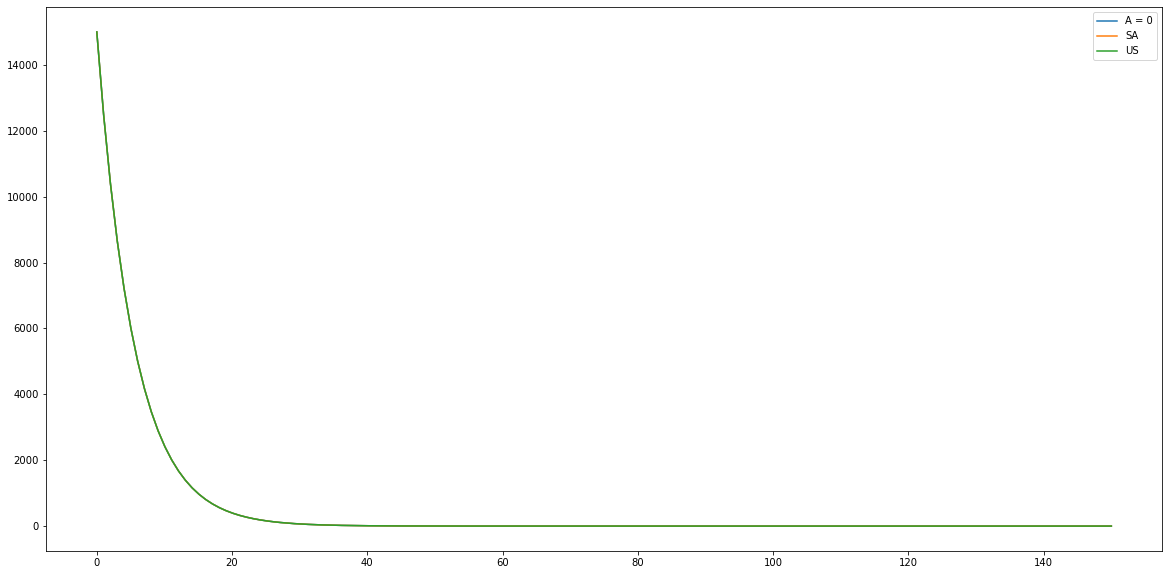

In [40]:
plt.figure(figsize=(20,10))
plt.plot(t, eA, label = "A = 0")
plt.plot(t, eSA, label = "SA")
plt.plot(t, eUS, label = "US")
plt.legend()

In [180]:
print(x[:,0])

[10000000.         10001283.60221745 10002150.5188107  10002779.5750904
 10003292.10912393 10003768.8498455  10004262.02296747 10004804.00856114
 10005413.51184127 10006099.94397985 10006866.51710792 10007712.4177005
 10008634.32107102 10009627.43626101 10010686.21745528 10011804.8396896
 10012977.50894745 10014198.65671166 10015463.05471323 10016765.87523321
 10018102.71492452 10019469.59474767 10020862.94485021 10022279.5804799
 10023716.67309364 10025171.71946554 10026642.51062873 10028127.10181632
 10029623.78410235 10031131.05812274]


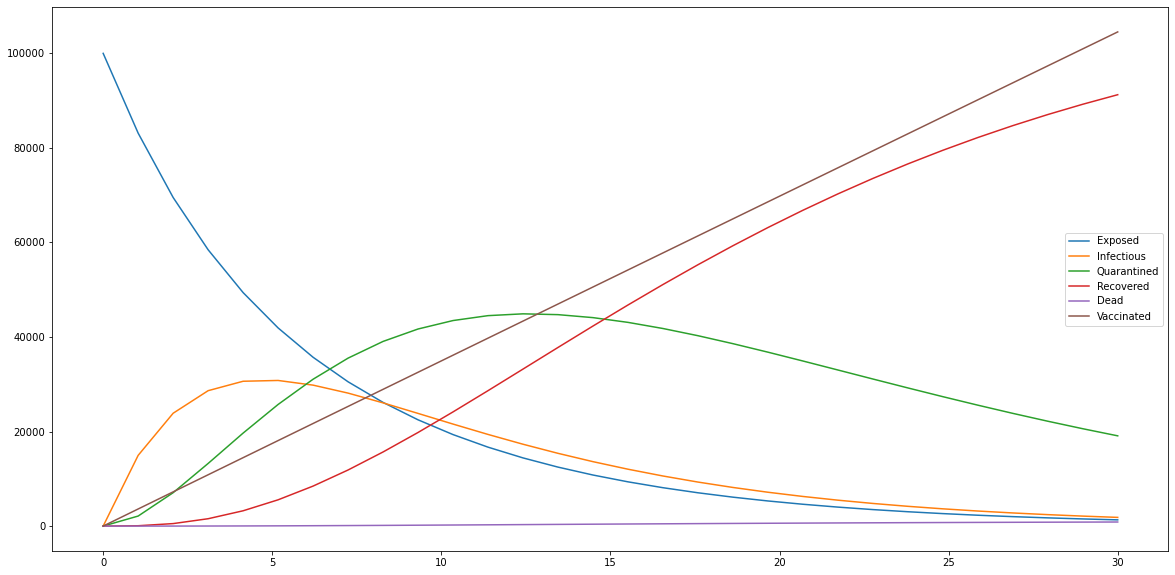

In [28]:
plt.figure(figsize=(20, 10))
#plt.plot(t, s, label = "Susceptible")
plt.plot(t, e, label = "Exposed")
plt.plot(t, i, label = "Infectious")
plt.plot(t, q, label = "Quarantined")
plt.plot(t, r, label = "Recovered")
plt.plot(t, d, label = "Dead")
plt.plot(t, v, label = "Vaccinated")
plt.legend()

In [5]:
times = pd.read_csv("combined-covid.csv")
times.head()

,Unnamed: 0,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,...,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Total_Test_Results,Case_Fatality_Ratio
0,0,Alabama,US,2020-04-28,32.3182,-86.9023,6621,228,NaN,6311.0,...,139.457105,73997.0,872.0,3.486772,84000001.0,USA,1578.132341,13.335372,NaN,NaN
1,1,Alaska,US,2020-04-28,61.3707,-152.4044,345,9,218.0,336.0,...,57.716533,16256.0,10.0,2.608696,84000002.0,USA,2719.536126,2.898551,NaN,NaN
2,2,American Samoa,US,2020-04-28,-14.2710,-170.1320,0,0,NaN,NaN,...,0.000000,3.0,NaN,NaN,16.0,ASM,5.391708,NaN,NaN,NaN
3,3,Arizona,US,2020-04-28,33.7298,-111.4312,6725,275,1418.0,6450.0,...,92.392657,81952.0,1051.0,4.089219,84000004.0,USA,914.213315,15.628253,NaN,NaN
4,4,Arkansas,US,2020-04-28,34.9697,-92.3731,3069,51,987.0,3018.0,...,118.538741,40457.0,109.0,1.661779,84000005.0,USA,1562.633375,3.551645,NaN,NaN


In [6]:
vacc = pd.read_csv("../raw-data/United States.txt")

In [7]:
vacc.head()

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,United States,2020-12-20,Pfizer/BioNTech,https://www.cdc.gov/coronavirus/2019-ncov/vacc...,556208,556208.0,NaN
1,United States,2020-12-21,Pfizer/BioNTech,https://covid.cdc.gov/covid-data-tracker/#vacc...,614117,614117.0,NaN
2,United States,2020-12-23,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,1008025,1008025.0,NaN
3,United States,2020-12-26,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,1944585,1944585.0,NaN
4,United States,2020-12-28,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,2127143,2127143.0,NaN


In [8]:
vacc = vacc.set_index("date")["people_vaccinated"]
vacc.head()

date
2020-12-20     556208.0
2020-12-21     614117.0
2020-12-23    1008025.0
2020-12-26    1944585.0
2020-12-28    2127143.0
Name: people_vaccinated, dtype: float64

In [11]:

vacc.index.rename("Last_Update")
groups = groups.join(vacc)
groups["people_vaccinated"] = groups["people_vaccinated"].fillna(0)
groups.head()

,Confirmed,Deaths,Recovered,Active,people_vaccinated
Last_Update,,,,,
2020-04-28,988903,56867,206169.0,820407.0,0.0
2020-04-29,1013417,58948,255235.0,838291.0,0.0
2020-04-30,1040925,61453,268204.0,858222.0,0.0
2020-05-01,1070403,63355,153947.0,852481.0,0.0
2020-05-02,1104625,65317,164015.0,874503.0,0.0


In [10]:
times.columns.values

array(['Unnamed: 0', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'FIPS', 'Incident_Rate', 'People_Tested', 'People_Hospitalized',
       'Mortality_Rate', 'UID', 'ISO3', 'Testing_Rate',
       'Hospitalization_Rate', 'Total_Test_Results',
       'Case_Fatality_Ratio'], dtype=object)

In [10]:
groups = times.groupby('Last_Update').agg({"Confirmed" : np.sum, "Deaths" : np.sum, "Recovered" : np.sum,
                                          "Active" : np.sum})

In [12]:
groups.head()

,Confirmed,Deaths,Recovered,Active,people_vaccinated
Last_Update,,,,,
2020-04-28,988903,56867,206169.0,820407.0,0.0
2020-04-29,1013417,58948,255235.0,838291.0,0.0
2020-04-30,1040925,61453,268204.0,858222.0,0.0
2020-05-01,1070403,63355,153947.0,852481.0,0.0
2020-05-02,1104625,65317,164015.0,874503.0,0.0


No handles with labels found to put in legend.


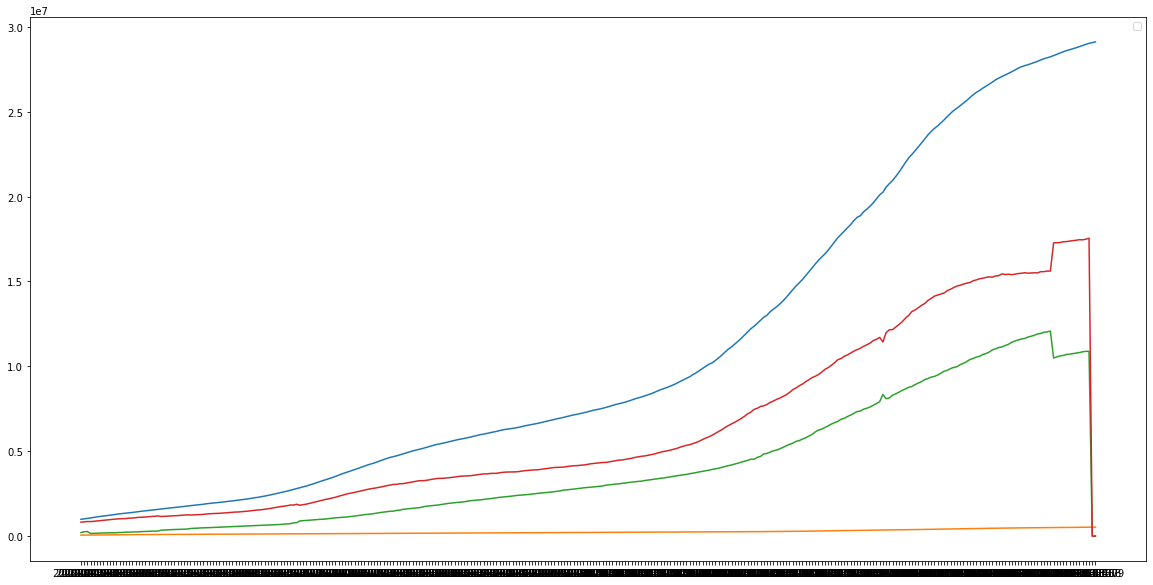

In [19]:
plt.figure(figsize=(20,10))
plt.plot(groups)
plt.legend()

In [13]:
test = groups.set_index(np.linspace(1, len(groups), len(groups)))
test = test[test["Active"] != 0]
test["Population"] = 328200000
test["Exposed"] = test["Confirmed"]
test["Infectious"] = test["Active"]
test["Vaccinated"] = test["people_vaccinated"]
test["Quarantined"] = test["Confirmed"].shift(-1) - test["Confirmed"]
test["Susceptible"] = test["Population"] - test["Exposed"] - test["Infectious"] - test["Quarantined"] - test["Recovered"] - test["Deaths"] - test["Vaccinated"]
test.head()

,Confirmed,Deaths,Recovered,Active,people_vaccinated,Population,Exposed,Infectious,Vaccinated,Quarantined,Susceptible
1.0,988903,56867,206169.0,820407.0,0.0,328200000,988903,820407.0,0.0,24514.0,326103140.0
2.0,1013417,58948,255235.0,838291.0,0.0,328200000,1013417,838291.0,0.0,27508.0,326006601.0
3.0,1040925,61453,268204.0,858222.0,0.0,328200000,1040925,858222.0,0.0,29478.0,325941718.0
4.0,1070403,63355,153947.0,852481.0,0.0,328200000,1070403,852481.0,0.0,34222.0,326025592.0
5.0,1104625,65317,164015.0,874503.0,0.0,328200000,1104625,874503.0,0.0,28887.0,325962653.0


In [14]:
to_fit = test[["Susceptible", "Exposed", "Infectious", "Quarantined", "Recovered", "Deaths", "Vaccinated", "Population"]]
to_fit.head()

,Susceptible,Exposed,Infectious,Quarantined,Recovered,Deaths,Vaccinated,Population
1.0,326103140.0,988903,820407.0,24514.0,206169.0,56867,0.0,328200000
2.0,326006601.0,1013417,838291.0,27508.0,255235.0,58948,0.0,328200000
3.0,325941718.0,1040925,858222.0,29478.0,268204.0,61453,0.0,328200000
4.0,326025592.0,1070403,852481.0,34222.0,153947.0,63355,0.0,328200000
5.0,325962653.0,1104625,874503.0,28887.0,164015.0,65317,0.0,328200000


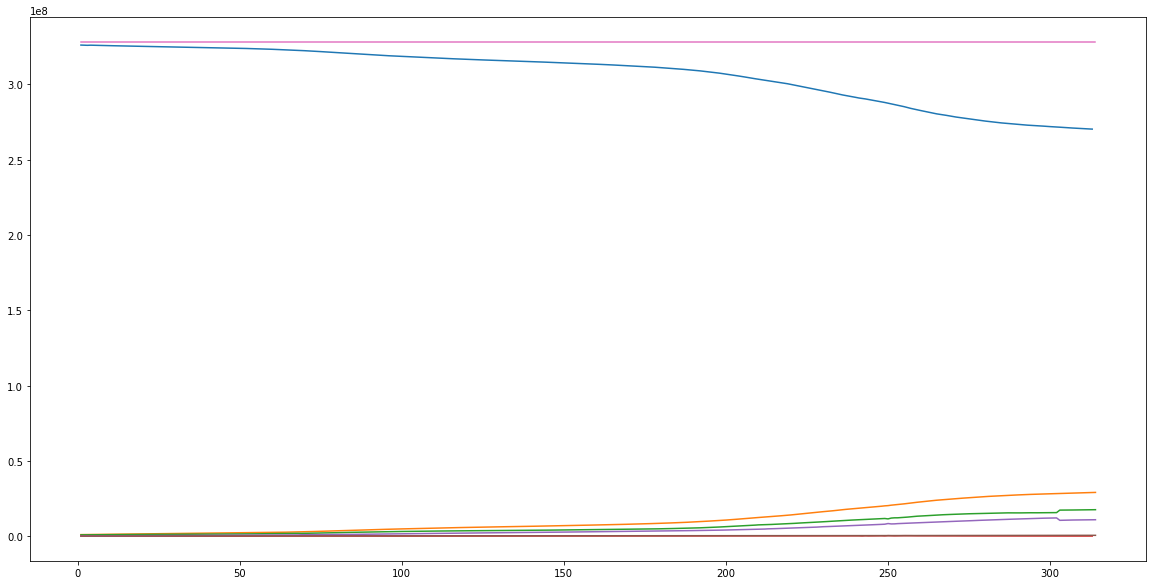

In [52]:
plt.figure(figsize=(20,10))
plt.plot(to_fit)

In [16]:
to_fit = to_fit.iloc[:-1]
to_fit.tail()
to_fit.to_csv("seirdataset.csv")

In [1]:
S0 = to_fit["Susceptible"].iloc[1]
E0 = to_fit["Exposed"].iloc[1]
I0 = to_fit["Infectious"].iloc[1]
Q0 = to_fit["Quarantined"].iloc[1]
R0 = to_fit["Recovered"].iloc[1]
D0 = to_fit["Deaths"].iloc[1]
V0 = 0
x0 = [S0, E0, I0, Q0, R0, D0, V0]
t = np.linspace(0, 60, 60)
x = odeint(seir2, x0, t)
s = x[:, 0]; e = x[:, 1]; i = x[:, 2]; q = x[:, 3]; r = x[:, 4]; d = x[:, 5]; v = x[:, 6]; 
to_fit.to_csv("../clean-data/timeseries.csv")

NameError: name 'to_fit' is not defined

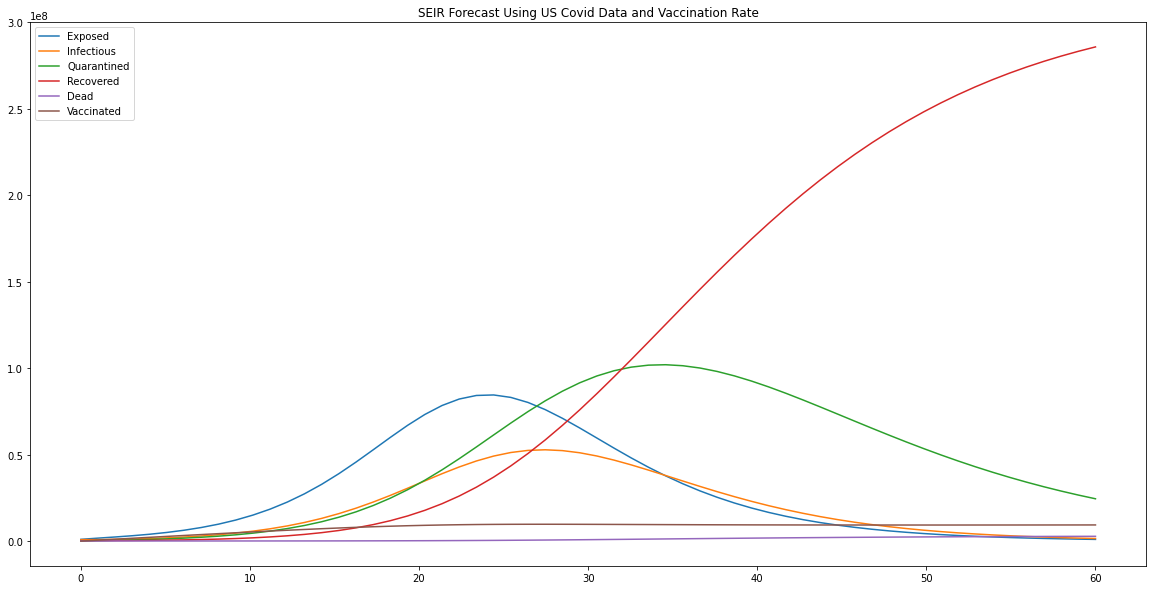

In [158]:
plt.figure(figsize=(20, 10))
plt.xlabel = "Days"
plt.ylabel = "Population"
#plt.plot(t, s, label = "Susceptible")
plt.plot(t, e, label = "Exposed")
plt.plot(t, i, label = "Infectious")
plt.plot(t, q, label = "Quarantined")
plt.plot(t, r, label = "Recovered")
plt.plot(t, d, label = "Dead")
plt.plot(t, v, label = "Vaccinated")
plt.title("SEIR Forecast Using US Covid Data and Vaccination Rate")
plt.legend()

In [54]:
from scipy.optimize import curve_fit

In [64]:
tspan = np.linspace(1, len(to_fit), len(to_fit))
xData = to_fit[["Population", "Susceptible", "Infectious"]].values
def fitfunc(t, v, b2, a, u):
    def myode(x, t):
        N, S, I = x
        return (v * N) - (b2 * S * I) - (a * S) - (u * S)
    x0 = to_fit[["Population", "Susceptible", "Infectious"]].iloc[1].values
    solver = odeint(myode, x0, t)
    return solver[:,0], solver[:,1], solver[:,2], solver[:,3];
fits, cov = curve_fit(fitfunc, tspan, xData, p0 = 1.3)
print(fits)


IndexError: invalid index to scalar variable.

In [63]:
tspan = [0, 0.1, 0.2, 0.4, 0.8, 1]
Ca_data = [2.0081,  1.5512,  1.1903,  0.7160,  0.2562,  0.1495]

def fitfunc(t, k):
    'Function that returns Ca computed from an ODE for a k'
    def myode(Ca, t):
        return -k * Ca

    Ca0 = Ca_data[0]
    Casol = odeint(myode, Ca0, t)
    return Casol[:,0]

k_fit, kcov = curve_fit(fitfunc, tspan, Ca_data, p0=1.3)
print(k_fit)

[2.58893455]


In [75]:
def susc(N, S, I, v, b2, a, u):
    return (v * N) - (b2 * S * I) - (a * S) - (u * S)
Ndata = to_fit["Population"].values
Sdata = to_fit["Susceptible"].values
Idata = to_fit["Infectious"].values
ydata = to_fit["Susceptible"].values

In [76]:
popt, pcov = curve_fit(susc, [Ndata, Sdata, Idata], ydata)
popt

TypeError: Improper input: N=6 must not exceed M=3

In [74]:
ydata

array([3.26103140e+08, 3.26006601e+08, 3.25941718e+08, 3.26025592e+08,
       3.25962653e+08, 3.25908162e+08, 3.25860163e+08, 3.25813635e+08,
       3.25765354e+08, 3.25712888e+08, 3.25657461e+08, 3.25604666e+08,
       3.25559446e+08, 3.25521342e+08, 3.25480430e+08, 3.25438039e+08,
       3.25390226e+08, 3.25337734e+08, 3.25287630e+08, 3.25243577e+08,
       3.25202894e+08, 3.25160883e+08, 3.25117638e+08, 3.25068901e+08,
       3.25019732e+08, 3.24974615e+08, 3.24932508e+08, 3.24892835e+08,
       3.24854836e+08, 3.24817750e+08, 3.24776900e+08, 3.24729976e+08,
       3.24681510e+08, 3.24637798e+08, 3.24596950e+08, 3.24554854e+08,
       3.24514231e+08, 3.24473163e+08, 3.24421772e+08, 3.24369054e+08,
       3.24327692e+08, 3.24291850e+08, 3.24256073e+08, 3.24216439e+08,
       3.24172737e+08, 3.24124117e+08, 3.24072702e+08, 3.24027977e+08,
       3.23988528e+08, 3.23944806e+08, 3.23894207e+08, 3.23840540e+08,
       3.23780986e+08, 3.23716681e+08, 3.23658904e+08, 3.23600095e+08,
      

In [77]:
!pip install symfit

     |████████████████████████████████| 942 kB 1.9 MB/s eta 0:00:01
  Created wheel for symfit: filename=symfit-0.5.3-py2.py3-none-any.whl size=75861 sha256=17aca640eacaa2e196b8374ac2d8acfded599a37868785c84ccb6ecb1d2a0ce1
  Stored in directory: /Users/dallas/Library/Caches/pip/wheels/11/00/d8/c321fee9edd43c1468723692ef502cdcd981d4251db5cf3bd6
Successfully built symfit


In [104]:
from symfit import variables, parameters, ODEModel, Fit, D, Parameter

In [151]:
N = to_fit["Population"][1]

tdata = np.asarray(range(1, 315))
sdata = to_fit["Susceptible"].values
edata = to_fit["Exposed"].values
idata = to_fit["Infectious"].values
qdata = to_fit["Quarantined"].values
rdata = to_fit["Recovered"].values
ddata = to_fit["Deaths"].values
vdata = to_fit["Vaccinated"].values

print(tdata.shape, sdata.shape)

#t, S, E, I, Q, R, d, V = variables('t, S, E, I, Q, R, d, V')
S, I = variables('S, I')
#v, b2, a, u, gamma, sigma, delta, k, lamb, p = parameters('v, b2, a, u, gamma, sigma, delta, k, lamb, p')
v = Parameter("v")
b2 = Parameter("b2")
a = Parameter("a")
u = Parameter("u")
#gamma = Parameter("gamma", value = 1/5.5, fixed = False)
#sigma = Parameter("sigma", value = 0.05, fixed = False)
#delta = Parameter("delta", value = 1/3.8, fixed = False)
#k = Parameter("k", value = 0.014, fixed = False)
#lamb = Parameter("lamb", value = 1/10., fixed = False)
#p = Parameter("p", value = 1/15., fixed = False)

s0 = to_fit["Susceptible"].values[0]
e0 = to_fit["Exposed"].values[0]
i0 = to_fit["Infectious"].values[0]
q0 = to_fit["Quarantined"].values[0]
r0 = to_fit["Recovered"].values[0]
d0 = to_fit["Deaths"].values[0]
v0 = to_fit["Vaccinated"].values[0]

model_dict = {
    D(S, t): (v * N) - (b2 * S * I) - (a * S) - (u * S),
    #D(E, t): (b2 * S * I) - (gamma * E) + (sigma * b2 * V * I) - (u * E),
    #D(I, t): (gamma * E) - (delta * I) - (u * I),
    #D(Q, t): (delta * I) - ((1 - k) * lamb * Q) - (k * p * Q) - (u * Q),
    #D(R, t): ((1 - k) * lamb * Q) - (u * R),
    #D(d, t): k * p * Q,
    #D(V, t): (a * S) - (sigma * b2 * V * I) - (u * V)
    }

#ode_model = ODEModel(model_dict, initial={t: 0.0, S: s0, E: e0, I: i0, Q: q0, R: r0, d: d0, V: v0})
ode_model = ODEModel(model_dict, initial={t: 0.0, S: s0, I: i0})

#fit = Fit(ode_model, t=tdata, S=sdata, E=edata, I=idata, Q=qdata, R=rdata, d=ddata, V=vdata)
fit = Fit(ode_model, t=tdata, S=sdata)
fit_result = fit.execute()

(314,) (314,)


In [152]:
fit_result.params

OrderedDict([('a', 1.0), ('b2', 1.0), ('u', 1.0), ('v', 1.0)])

In [153]:
!pip install lmfit

     |████████████████████████████████| 306 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 55 kB 507 kB/s eta 0:00:011
     |████████████████████████████████| 246 kB 7.3 MB/s eta 0:00:01
  Created wheel for lmfit: filename=lmfit-1.0.2-py3-none-any.whl size=85263 sha256=27e8f5c48acc49040a40c0bf8661f0cbdcfb8a62b46cc16e262106a146fc1dca
  Stored in directory: /Users/dallas/Library/Caches/pip/wheels/2c/17/f4/1ec5177c8589e18c329907db7db4f1c4524bb73251d34f3622
  Created wheel for asteval: filename=asteval-0.9.23-py3-none-any.whl size=17420 sha256=95042848d495314fbc4406be797abd61bc289870367f67c887f9f3cbe6ea9886
  Stored in directory: /Users/dallas/Library/Caches/pip/wheels/2f/3c/df/1c0eafdd1d6ff5b36e3a0030eaab4d8465f8f94ae9c2b74d39
Successfully built lmfit asteval


In [164]:
from lmfit import minimize, Parameters, Parameter, report_fit
def f(xs, t, ps):
    N = to_fit["Population"][1]
    v = ps['v'].value
    b2 = ps['b2'].value
    a = ps['a'].value
    u = ps['u'].value
    S, I = xs
    return (v * N) - (b2 * S * I) - (a * S) - (u * S)
def g(t, x0, ps):
    x = odeint(f, x0, t, args=(ps,))
    return x
def residual(ps, ts, data):
    x0 = ps['x0'].value, ps['y0'].value
    model = g(ts, x0, ps)
    return (model - data).ravel()
t = np.linspace(1, len(to_fit), len(to_fit))
x0 = np.array([to_fit["Susceptible"].values[0], to_fit["Infectious"].values[0]])

data = to_fit["Susceptible"].values

params = Parameters()
params.add('x0', value=to_fit["Susceptible"].values[0])
params.add('y0', value=to_fit["Infectious"].values[0])
params.add('v', value=0.00018)
params.add('b2', value=3.43*10**-9)
params.add('a', value=0)
params.add('u', value = 3*10**-5)

result = minimize(residual, params, args=(t, data), method='leastsq')
final = data + result.residual.reshape(data.shape)

RuntimeError: The size of the array returned by func (1) does not match the size of y0 (2).

In [181]:
def tryingFit(t, v, b2, a, u):
    x = odeint(seir2, x0, t)
    return x[:,0]
tspan = np.linspace(1, 313, 313)
Sdata = to_fit["Susceptible"].iloc[:-1].values
pfit, pcov = curve_fit(tryingFit, tspan, Sdata)
print(pfit)

RuntimeError: The size of the array returned by func (1) does not match the size of y0 (2).

In [41]:
def seir2(x, t):
    S, E, I, Q, R, D, V = x
    N = sum(x)
    #Vaccination rate is vaccinated/population/days
    v = 0.00018 # New births and new residents
    b1 = 8.58 * 10**-9 #Transmission rate before intervention
    b2 = 3.43 * 10**-9 #Transmission rate during and after intervention
    a = 3.5 * 10**-4 # Vaccination rate
    #a = a_us
    u = 3 * 10**-5 #Natural death rate
    gamma = 1/5.5 #Incubation period
    sigma = 0.05 #Vaccine inefficacy
    delta = 1/3.8 #Infection time
    k = 0.014 #Case fatality rate
    lamb = 1/10 #Recovery time
    p = 1/15 #Time until death
    dx = np.zeros(7)
    dx[0] = (v * N) - (b2 * S * I) - (a * S) - (u * S)
    dx[1] = (b2 * S * I) - (gamma * E) + (sigma * b2 * V * I) - (u * E)
    dx[2] = (gamma * E) - (delta * I) - (u * I)
    dx[3] = (delta * I) - ((1-k) * lamb * Q) - (k * p * Q) - (u * Q)
    dx[4] = ((1 - k) * lamb * Q) - (u * R)
    dx[5] = k * p * Q
    dx[6] = (a * S) - (sigma * b2 * V * I) - (u * V)
    return dx

In [42]:
def seira0(x, t):
    S, E, I, Q, R, D, V = x
    N = sum(x)
    #Vaccination rate is vaccinated/population/days
    v = 0.00018 # New births and new residents
    b1 = 8.58 * 10**-9 #Transmission rate before intervention
    b2 = 3.43 * 10**-9 #Transmission rate during and after intervention
    #a = 3.5 * 10**-4 # Vaccination rate
    a = 0
    u = 3 * 10**-5 #Natural death rate
    gamma = 1/5.5 #Incubation period
    sigma = 0.05 #Vaccine inefficacy
    delta = 1/3.8 #Infection time
    k = 0.014 #Case fatality rate
    lamb = 1/10 #Recovery time
    p = 1/15 #Time until death
    dx = np.zeros(7)
    dx[0] = (v * N) - (b2 * S * I) - (a * S) - (u * S)
    dx[1] = (b2 * S * I) - (gamma * E) + (sigma * b2 * V * I) - (u * E)
    dx[2] = (gamma * E) - (delta * I) - (u * I)
    dx[3] = (delta * I) - ((1-k) * lamb * Q) - (k * p * Q) - (u * Q)
    dx[4] = ((1 - k) * lamb * Q) - (u * R)
    dx[5] = k * p * Q
    dx[6] = (a * S) - (sigma * b2 * V * I) - (u * V)
    return dx

In [131]:
def seirUS(x, t):
    S, E, I, Q, R, D, V = x
    N = sum(x)
    #Vaccination rate is vaccinated/population/days
    v = 0.00018 # New births and new residents
    b1 = 8.58 * 10**-9 #Transmission rate before intervention
    b2 = 3.43 * 10**-9 #Transmission rate during and after intervention
    #a = 3.5 * 10**-4 # Vaccination rate
    a = .5
    u = 3 * 10**-5 #Natural death rate
    gamma = 1/5.5 #Incubation period
    sigma = 0.05 #Vaccine inefficacy
    delta = 1/3.8 #Infection time
    k = 0.014 #Case fatality rate
    lamb = 1/10 #Recovery time
    p = 1/15 #Time until death
    dx = np.zeros(7)
    dx[0] = (v * N) - (b2 * S * I) - (a * S) - (u * S)
    dx[1] = (b2 * S * I) - (gamma * E) + (sigma * b2 * V * I) - (u * E)
    dx[2] = (gamma * E) - (delta * I) - (u * I)
    dx[3] = (delta * I) - ((1-k) * lamb * Q) - (k * p * Q) - (u * Q)
    dx[4] = ((1 - k) * lamb * Q) - (u * R)
    dx[5] = k * p * Q
    dx[6] = (a * S) - (sigma * b2 * V * I) - (u * V)
    return dx

In [132]:
S0 = 500000
E0 = 30000
I0 = 0
Q0 = 0
R0 = 0
D0 = 0
V0 = 0
x0 = [S0, E0, I0, Q0, R0, D0, V0]
t = np.linspace(0, 180, 180)

In [133]:
a_us

0.0016629711751662971

In [134]:
xa0 = odeint(seira0, x0, t)
sA = xa0[:, 0]; eA = xa0[:, 1]; iA = xa0[:, 2]; qA = xa0[:, 3]; rA = xa0[:, 4]; dA = xa0[:, 5]; vA = xa0[:, 6];

In [135]:
xaSA = odeint(seir2, x0, t)
sSA = xaSA[:, 0]; eSA = xaSA[:, 1]; iSA = xaSA[:, 2]; qSA = xaSA[:, 3]; rSA = xaSA[:, 4]; dSA = xaSA[:, 5]; vSA = xaSA[:, 6];

In [136]:
xaUS = odeint(seirUS, x0, t)
sUS = xaUS[:, 0]; eUS = xaSA[:, 1]; iUS = xaSA[:, 2]; qUS = xaSA[:, 3]; rUS = xaSA[:, 4]; dUS = xaSA[:, 5]; vUS = xaSA[:, 6];

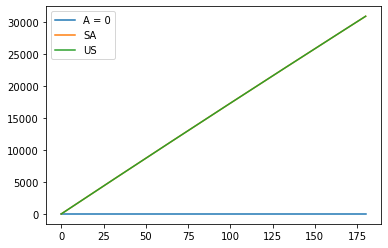

In [139]:
#plt.plot(t, eA)
#plt.plot(t, iA)
#plt.plot(t, qA)
plt.plot(t, vA, label = "A = 0")
plt.plot(t, vSA, label = "SA")
plt.plot(t, vUS, label = "US")
#plt.plot(t, dA)
#plt.plot(t, vA)
#plt.plot(t, rSA)
#plt.plot(t, rUS)
plt.legend()

In [116]:
print()

-0.09610690735280514
